In [1]:
#Versão do Python
from platform import python_version
print('Versão da Linguagem Python utilizada:', python_version())

Versão da Linguagem Python utilizada: 3.9.7


In [2]:
#para instalar um pacote no Python
#!pip install nomedopacote==versaodesejada
#watermark > gravar as versões de outros pacotes utilizados neste jupyter notebook
!pip install -q -U watermark

In [3]:
#importacoes
#import -nomedopacote- as -apelidopacote-
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Versões dos pacotes utilizados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.3.4
numpy     : 1.20.3
seaborn   : 0.11.2
matplotlib: 3.4.3



In [5]:
#Carregando os dados
dadosRH = pd.read_csv('dadosRH.csv')

In [6]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [7]:
#verifica quantas linhas e colunas
dadosRH.shape

(54808, 11)

In [8]:
#contas quantos registros em branco há
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [9]:
##Análise Exploratória
#agrupamento por critério
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\marcos.medeiros.MOBTELECOM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

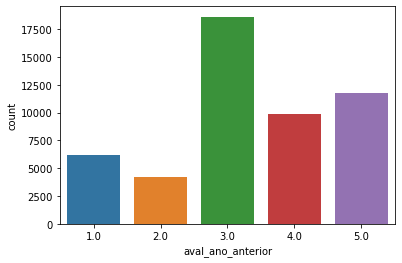

In [10]:
sns.countplot(dadosRH['aval_ano_anterior'])

In [11]:
#preencher os valores ausentes
#fillna - preencher valores ausentes da educação, 0 > maior valor, inplace = salvar na tabela
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [12]:
#preencher valores ausnetes com mediana, inplace = salvar na tabela
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [13]:
#verifica agora se tá ok
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [14]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


C:\Users\marcos.medeiros.MOBTELECOM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

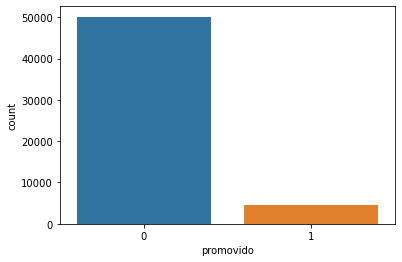

In [15]:
sns.countplot(dadosRH['promovido'])

In [16]:
#Balanceamento de classe
# serve quando há uma situação em que há muito mais registros de uma classe do que de outra, comprometendo um possível modelo de machine learning
# separando classes majoritarias e minoritárias
df_class_min = dadosRH[dadosRH.promovido==1]
df_class_maj = dadosRH[dadosRH.promovido==0]

In [17]:
df_class_min.shape

(4668, 11)

In [18]:
df_class_maj.shape

(50140, 11)

In [19]:
#upsample = criação de amostragem artificial para balancear uma classe
from sklearn.utils import resample
df_class_min_upsampled = resample(df_class_min, 
                                 replace = True,
                                 n_samples = 50140,
                                 random_state = 150)

In [20]:
dadosRH_balanceados = pd.concat([df_class_maj, df_class_min_upsampled])

In [21]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

C:\Users\marcos.medeiros.MOBTELECOM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

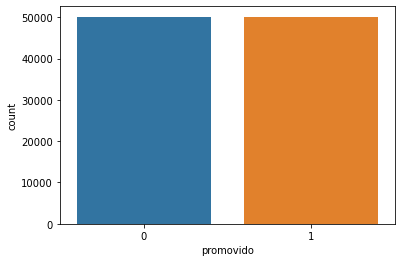

In [22]:
sns.countplot(dadosRH_balanceados['promovido'])

In [23]:
#index = toda função em pandas tem índice (0, 1, 2, 3), false = sem índice
dadosRH_balanceados.to_csv('dadosRH_modificados.csv', encoding = 'utf-8', index = False)

In [24]:
#execução do dataset para o Power BI
dataset = pd.read_csv('dadosRH_modificados.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [25]:
dataset.shape

(100280, 11)

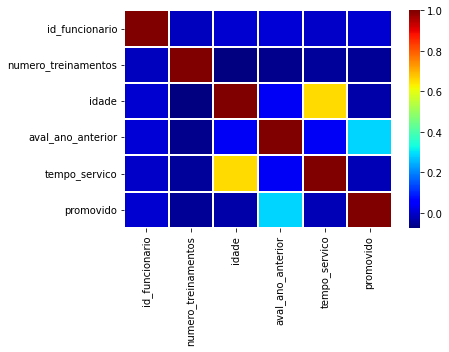

In [26]:
#Pergunta 1
#Qual a correlação entre os atributos dos funcionários
#como é pro Power BI, tem sempre que importar os pacotes
import seaborn as sns
import matplotlib.pyplot as plt

corr = dataset.corr() #correlação
sns.heatmap(corr, cmap = "jet", linewidths = 0.1) #mapa de calor
plt.show()

C:\Users\marcos.medeiros.MOBTELECOM\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

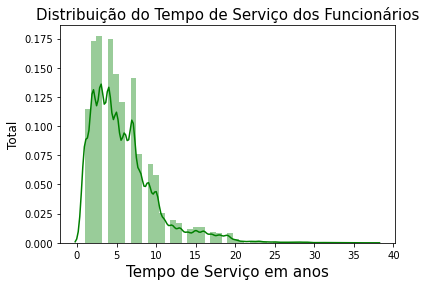

In [27]:
#Pergunta 2
#Qual o tempo de serviço da maioria dos funcionários?
#distplot = gráfico de distribuição
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em anos', fontsize = 15)
plt.ylabel('Total', fontsize = 12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

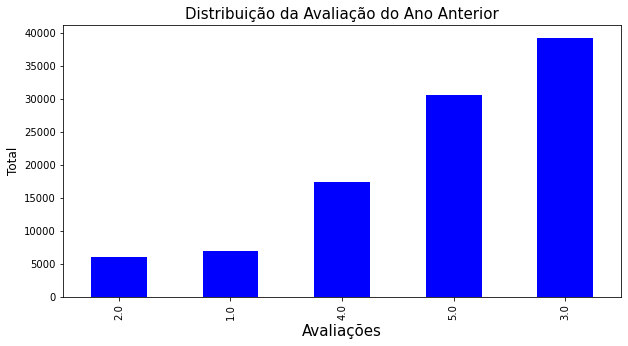

In [28]:
#Pergunta 3 - Qual avaliação  do Ano Anterior foi mais comum?
import seaborn as sns
import matplotlib.pyplot as plt
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize= (10,5))
plt.title('Distribuição da Avaliação do Ano Anterior', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total', fontsize = 12)
plt.show

C:\Users\marcos.medeiros.MOBTELECOM\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

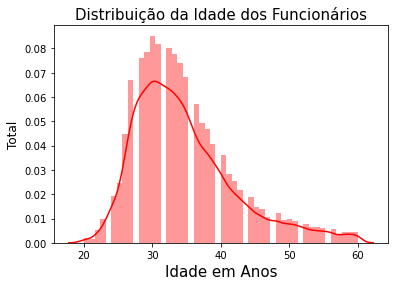

In [29]:
#Pergunta 4 - Distribuição das idades dos funcionários
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dataset['idade'], color = 'red')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade em Anos', fontsize = 15)
plt.ylabel('Total', fontsize = 12)
plt.show

C:\Users\marcos.medeiros.MOBTELECOM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

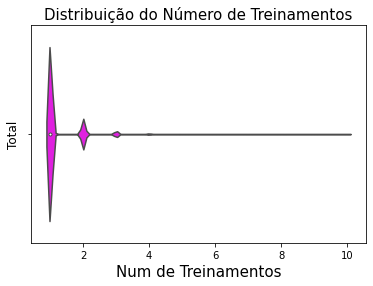

In [30]:
# Pergunta 5 - Qual o número de treinamentos mais frequente
#grafico alternativo para distribuição de frequencia
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(dataset['numero_treinamentos'], color = 'magenta')
plt.title('Distribuição do Número de Treinamentos', fontsize = 15)
plt.xlabel('Num de Treinamentos', fontsize = 15)
plt.ylabel('Total', fontsize = 12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

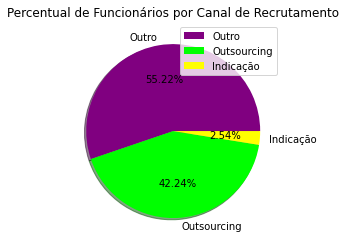

In [31]:
# Pergunta 6 - Qual a Proporção dos Funcionários
import seaborn as sns
import matplotlib.pyplot as plt
dataset['canal_recrutamento'].value_counts()

#o resultado deste counts fará parte do processo de proporção, criando um conjunto
fatias = [55375, 42358, 2547]
classes = "Outro", "Outsourcing", "Indicação"
cores = ['purple', 'lime', 'yellow']
explode = [0,0,0]
# hora de criar o gráfico
plt.pie(fatias, labels = classes, colors = cores, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title("Percentual de Funcionários por Canal de Recrutamento")
plt.axis('off')
plt.legend()
plt.show

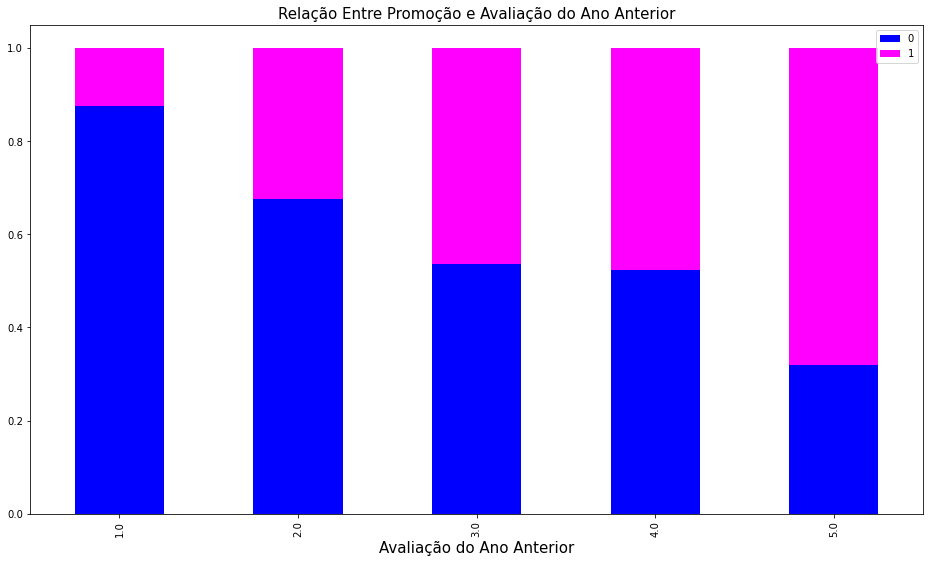

In [32]:
# Pergunta 7 - Relação entre promoção e avaliação do ano anterior
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (16,9),
                                                   color = ['blue', 'magenta'])
plt.title('Relação Entre Promoção e Avaliação do Ano Anterior', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()